### Packages and Settings

In [87]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nbagg')
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize 

### Loading DB

In [89]:
cancer_db = pd.read_csv("https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv")

In [90]:
cancer_db.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [91]:
print(cancer_db.columns) # Features in db
print(len(cancer_db.columns)) # Number of features in db

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
33


In [92]:
print(len(cancer_db)) # Number of data entrys

569


In [93]:
cancer_db['diagnosis'].value_counts() # Number of Benign tumors & Number of Malignant tumors

diagnosis
B    357
M    212
Name: count, dtype: int64

### Data Cleaning

In [95]:
# Drop unecessary columns
columns_to_drop = ['id', 'Unnamed: 32']
cancer_db.drop(columns_to_drop, axis = 1, inplace = True)

In [96]:
# Remove N/A values
cancer_db.dropna(inplace=True)
cancer_db.reset_index(drop=True, inplace=True)

In [97]:
dummies = pd.get_dummies(cancer_db["diagnosis"])
dummies.head()

cancer_db["outcome"] = dummies["M"]
cancer_db.drop(['diagnosis'], axis=1, inplace=True)

In [98]:
# Verifying all values are numeric
cancer_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

### Data Visualization

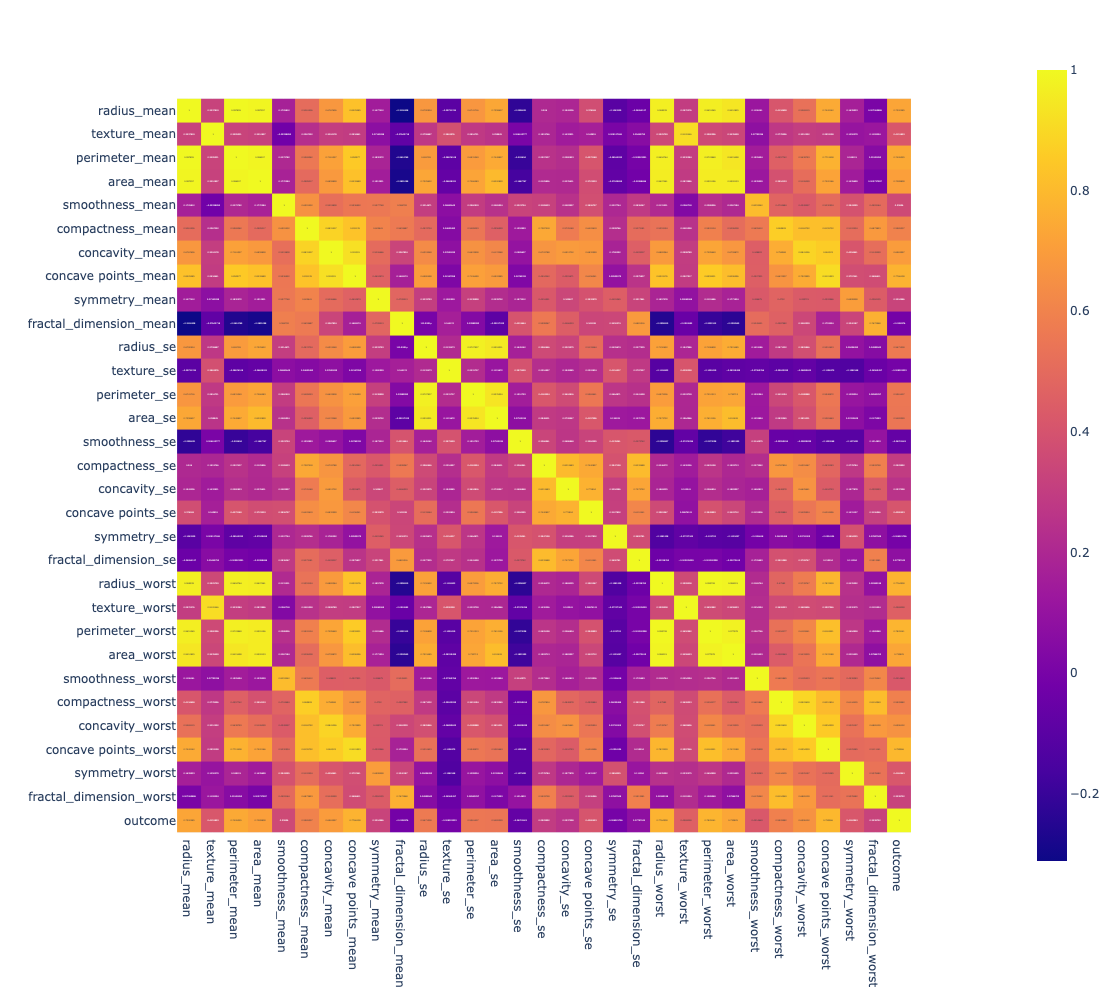

In [100]:
# Correlation Matrix

df_corr = cancer_db.corr()

fig = px.imshow(df_corr, text_auto = True, width = 1000, height = 1000)
fig.show()

### Data Pre-processing

In [102]:
# Defining the target feature
target = cancer_db['outcome']
input_columns = cancer_db.loc[:, cancer_db.columns != 'outcome']

In [103]:
# Splitting data, 80% will be training while 20% is testing
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [104]:
# Normalizing features for feature scaling
norm = Normalizer()

norm.fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

## Model Testing

For now this notebook will only test KNN, SVM, and Random Forest as this is only a practice notebook.
Might come back later on and test more models.

In [106]:
# Define each model parameter
KNN_params = {
    'n_neighbors' : [1,2,5,7,10,15,20]
}

SVM_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [2,3,4]
}

RF_params = {
    'n_estimators':[10,50,100]
}

In [107]:
# Stage each model to be tested

models = []

models.append(("RFC", RandomForestClassifier(), RF_params))
models.append(("SVM", SVC(), SVM_params))
models.append(("KNN", KNN(), KNN_params))


In [108]:
for model, instance, param in models:
    grid_search = GridSearchCV(instance, param)
    grid_search.fit(x_train_norm,y_train)

    y_hat = grid_search.predict(x_test_norm)
    TSE = np.sum((y_test ^ y_hat)**2)
    MSE = TSE/len(y_test)

    print("The Mean Squared Error for {}: {}".format(model, MSE))
    

The Mean Squared Error for RFC: 0.05263157894736842
The Mean Squared Error for SVM: 0.07894736842105263
The Mean Squared Error for KNN: 0.07894736842105263
